<a href="https://colab.research.google.com/github/marisbotero/fractal-geometry/blob/main/Fractales_Estoc%C3%A1sticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los fractales estocásticos son fractales generados por procesos estocásticos (o aleatorios). A diferencia de los fractales deterministas como el conjunto de Mandelbrot o el conjunto de Julia, que son generados por reglas fijas que se aplican repetidamente, los fractales estocásticos son generados por reglas que tienen algún elemento de aleatoriedad.

El movimiento browniano, por ejemplo, es un proceso estocástico y puede generar fractales. Los caminos generados por el movimiento browniano en dos o tres dimensiones son ejemplos de fractales estocásticos. Estos caminos son autosimilares en el sentido de que se ven "aproximadamente" iguales sin importar cuánto los amplíes, que es una característica clave de los fractales.

Otro ejemplo famoso de un fractal estocástico es el paisaje fractal (o terreno fractal). Este es un método para generar paisajes artificiales que se ven notablemente realistas. Los paisajes fractales se generan utilizando el ruido de Perlin (un tipo de ruido coherente graduado desarrollado por Ken Perlin), o más comúnmente utilizando el algoritmo diamante-cuadrado o el ruido simplex.

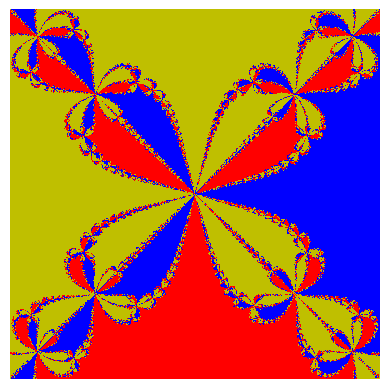

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['y', 'b', 'r', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)

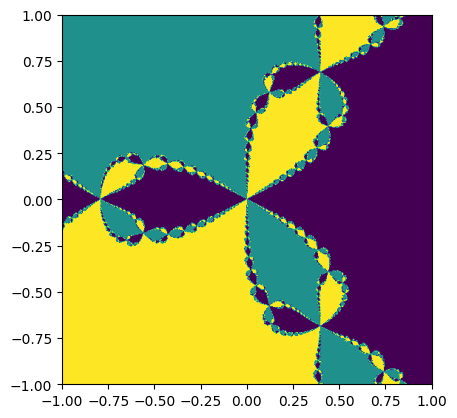

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractal(f, df, roots, xlim, ylim, res, iter_count):
    x = np.linspace(xlim[0], xlim[1], res[0])
    y = np.linspace(ylim[0], ylim[1], res[1])
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    output = np.zeros(Z.shape, dtype=int)

    for i in range(iter_count):
        Z -= f(Z)/df(Z)
        for j, root in enumerate(roots):
            output[np.isclose(Z, root)] = j + 1
    return output

def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

roots = [1, -0.5 + np.sqrt(3)/2j, -0.5 - np.sqrt(3)/2j]
xlim = (-1, 1)
ylim = (-1, 1)
res = (500, 500)
iter_count = 50

img = newton_fractal(f, df, roots, xlim, ylim, res, iter_count)

plt.imshow(img, extent=(xlim + ylim))
plt.show()


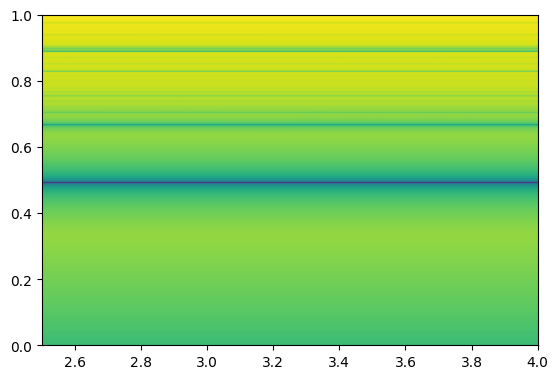

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# tamaño de la imagen
width = 800
height = 800
iterations = 1000

# rango de los valores
r = np.linspace(2.5, 4.0, width)
x = 1e-5 * np.ones(height)

lyapunov = np.empty((width, height))

# iteraciones para generar el fractal
for i in range(width):
    for j in range(iterations):
        x = r[i] * x * (1 - x)
        # Ignora los primeros valores de transición
        if j > iterations / 2:
            lyapunov[i] += np.log(abs(r[i] - 2 * r[i] * x))

# Normalizar el exponente de Lyapunov
lyapunov = lyapunov / iterations
lyapunov = lyapunov - np.min(lyapunov)
lyapunov = lyapunov / np.max(lyapunov)

# Dibujar el fractal
fig, ax = plt.subplots()
ax.imshow(lyapunov, origin='lower', extent=[2.5, 4, 0, 1])
plt.show()


<ipython-input-7-7d41b5d4d616>:22: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
<ipython-input-7-7d41b5d4d616>:22: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c
<ipython-input-7-7d41b5d4d616>:23: RuntimeWarning: overflow encountered in absolute
  mask = np.abs(Z) < 1000


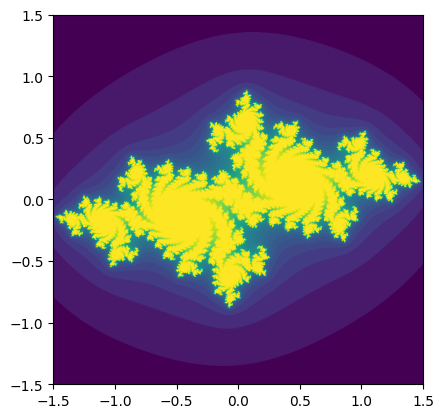

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# dimensiones de la imagen
width = 800
height = 800

# rango de los valores para x e y
x = np.linspace(-1.5, 1.5, width)
y = np.linspace(-1.5, 1.5, height)
X, Y = np.meshgrid(x, y)

# c es el parámetro para la función del conjunto de Julia
c = -0.7 + 0.27015j

# Z es el array de números complejos sobre el cual se va a iterar
Z = X + 1j * Y
img = np.zeros(Z.shape, dtype=float)

# iteraciones para generar el fractal
for i in range(100):
    Z = Z**2 + c
    mask = np.abs(Z) < 1000
    img += mask

# normalizar img para que los valores estén entre 0 y 1
img = np.log(img + 1)

# dibujar el fractal
plt.imshow(img, extent=(x.min(), x.max(), y.min(), y.max()))
plt.show()


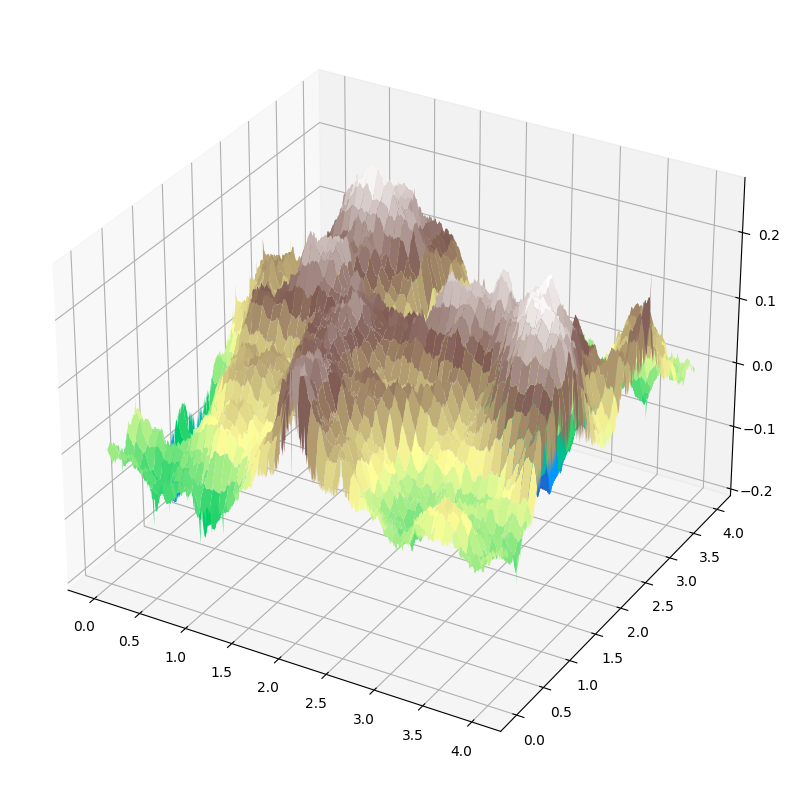

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def diamond_square(n, scale):
    # Se crea una matriz de nxn llena de ceros
    terrain = np.zeros((n, n))

    def avg(points):
        return sum(points) / len(points)

    def square(step):
        for y in range(step//2, n, step):
            for x in range(step//2, n, step):
                average = avg([
                    terrain[y-step//2][x-step//2],
                    terrain[y-step//2][x+step//2],
                    terrain[y+step//2][x-step//2],
                    terrain[y+step//2][x+step//2]
                ])
                terrain[y][x] = average + np.random.uniform(-scale, scale)

    def diamond(step):
        for y in range(0, n, step//2):
            for x in range((y + step//2) % step, n, step):
                average = avg([
                    terrain[(y-step//2)%n][x],
                    terrain[(y+step//2)%n][x],
                    terrain[y][(x-step//2)%n],
                    terrain[y][(x+step//2)%n]
                ])
                terrain[y][x] = average + np.random.uniform(-scale, scale)

    terrain[n//2][n//2] = np.random.uniform(-scale, scale)
    step = n
    while step > 1:
        square(step)
        diamond(step)
        step = step // 2
        scale = scale / 2

    return terrain

terrain = diamond_square(513, 0.5)
x = np.linspace(0, 4, terrain.shape[0])
y = np.linspace(0, 4, terrain.shape[1])
x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, terrain, cmap='terrain')
plt.show()
